In [1]:
# Import the pandas library, our main tool for working with data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the data folder
# The '../' means 'go up one level' from the notebooks folder to the main project folder
df = pd.read_csv('../data/kidney_stone_urine_analysis_extended.csv')

# Display the first 5 rows to see what it looks like
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10414 entries, 0 to 10413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10414 non-null  int64  
 1   gravity  10414 non-null  float64
 2   ph       10414 non-null  float64
 3   osmo     10414 non-null  int64  
 4   cond     10414 non-null  float64
 5   urea     10414 non-null  int64  
 6   calc     10414 non-null  float64
 7   target   10414 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 651.0 KB


In [3]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,10414.000000,10414.000000,10414.000000,10414.000000,10414.000000,10414.000000,10414.000000,10414.000000
mean,5206.500000,1.018502,6.091774,699.048973,19.613876,321.330901,3.786319,0.497791
std,3006.407186,0.005023,0.779672,168.518493,3.266934,111.931190,1.785018,0.500019
min,0.000000,1.005000,4.500000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,2603.250000,1.014999,5.500000,581.000000,17.673516,238.000000,2.461389,0.000000
50%,5206.500000,1.019000,6.176953,711.000000,19.887560,316.000000,3.340047,0.000000
75%,7809.750000,1.022291,6.726143,822.000000,21.690449,400.000000,5.008426,1.000000
max,10413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


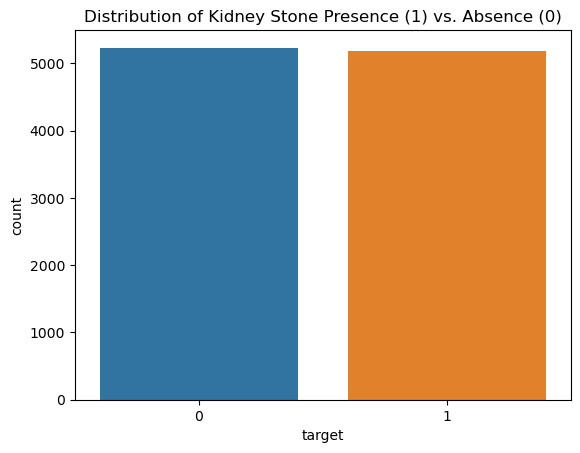

In [4]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Kidney Stone Presence (1) vs. Absence (0)')
plt.show()

In [5]:
# X gets all columns EXCEPT the 'target' column
X = df.drop('target', axis=1)

# y gets ONLY the 'target' column
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a dictionary to hold our models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [23]:
for name, model in models.items():
    # Train the model
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate and print the results
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")

--- Training Logistic Regression ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0.99      2083
   macro avg       0.99      0.99      0.99      2083
weighted avg       0.99      0.99      0.99      2083



--- Training Random Forest ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0.99      2083
   macro avg       0.99      0.99      0.99      2083
weighted avg       0.99      0.99      0.99      2083



--- Training XGBoost ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0

c:\Users\kcbho\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
# ADD THIS NEW CODE BLOCK
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the SAME scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [25]:
# MODIFY YOUR EXISTING LOOP LIKE THIS

for name, model in models.items():
    # Add max_iter for Logistic Regression
    if name == "Logistic Regression":
        model.set_params(max_iter=1000)

    print(f"--- Training {name} ---")
    # Use the SCALED data to fit the model
    model.fit(X_train_scaled, y_train)

    # Use the SCALED data for predictions
    y_pred = model.predict(X_test_scaled)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")
    

--- Training Logistic Regression ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0.99      2083
   macro avg       0.99      0.99      0.99      2083
weighted avg       0.99      0.99      0.99      2083



--- Training Random Forest ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0.99      2083
   macro avg       0.99      0.99      0.99      2083
weighted avg       0.99      0.99      0.99      2083



--- Training XGBoost ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1058
           1       0.99      0.99      0.99      1025

    accuracy                           0

c:\Users\kcbho\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:57:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier

# --- FINAL MODEL SELECTION ---
# We have chosen Random Forest as our champion based on the evaluation results
os.makedirs('../models', exist_ok=True)

# 1. Create an instance of the final model with the same settings
final_model = RandomForestClassifier(random_state=42)

# 2. Train it on ALL the available data to make it as smart as possible
final_model.fit(X, y) # Notice we use the original X and y, not the split data

# 3. Save the fully trained model to the 'models' folder
joblib.dump(final_model, '../models/kidney_stone_model.joblib')

print("Champion model saved successfully as 'kidney_stone_model.joblib'!")

Champion model saved successfully as 'kidney_stone_model.joblib'!
